In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd D:/Learning by doing/Data Science Notebooks/Kaggle/breast_cancer_wisconsin

D:\Learning by doing\Data Science Notebooks\Kaggle\breast_cancer_wisconsin


In [3]:
pwd

'D:\\Learning by doing\\Data Science Notebooks\\Kaggle\\breast_cancer_wisconsin'

In [4]:
# Looking into data and trying to drop useless data. Clearing the values

data = pd.read_csv('breast_cancer_wisconsin.csv')
data = data.drop(['Unnamed: 32','id'],axis = 1)

In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# To print all the data use Pandas options function
print(data[:])
pd.options.display.max_rows = 600

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

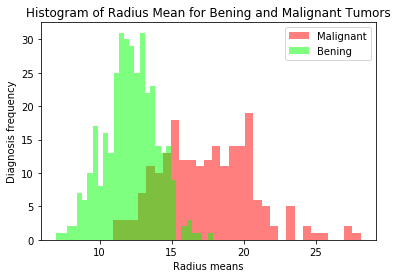

In [7]:
# Distribution of radius mean and diagnosis --> How many times appears malignant and bening in dataset
malignant = plt.hist(data[data["diagnosis"] == "M"].radius_mean, bins=30, fc = (1,0,0,0.5), label = "Malignant")
bening = plt.hist(data[data['diagnosis'] == 'B'].radius_mean, bins = 30, fc = (0,1,0,0.5), label = "Bening")
plt.legend()
plt.xlabel('Radius means')
plt.ylabel('Diagnosis frequency')
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")

plt.show()

In [8]:
# Boxplot and outliers in histogram above
# describe() method is used for descriptive stats such as mean, quartile etc.

malignant_data = data[data['diagnosis'] == 'M']

bening_data = data[data['diagnosis'] == 'B']

desc = bening_data.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print('Outliers in here: ', bening_data[(bening_data.radius_mean < lower_bound) | (bening_data.radius_mean > upper_bound)].radius_mean.values)


Outliers in here:  [ 6.981 16.84  17.85 ]


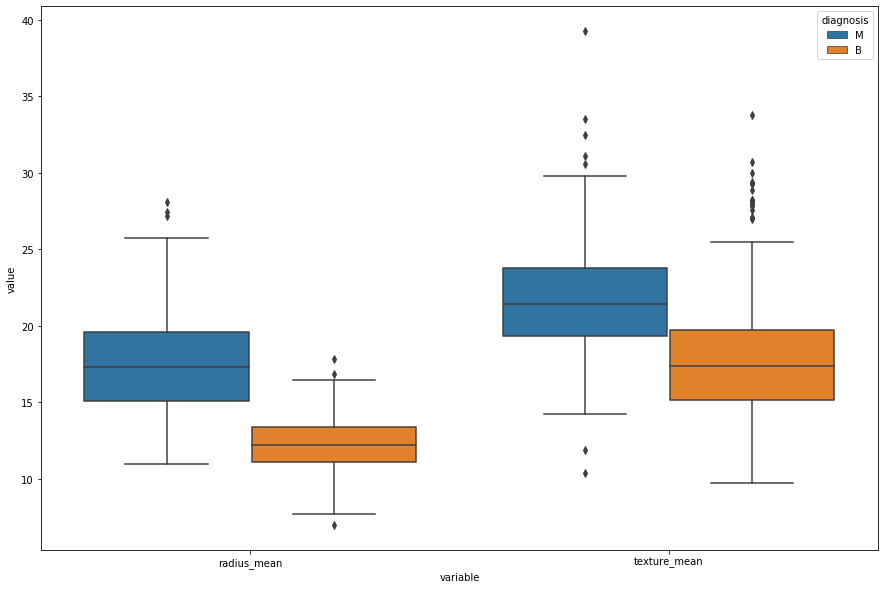

In [9]:
melted_data = pd.melt(data, id_vars = "diagnosis", value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue = "diagnosis", data = melted_data)
plt.show()

In [10]:
# Summary statistics with key parameters

print('Mean: ', bening_data.radius_mean.mean())
print('Variance: ', bening_data.radius_mean.var())
print('Standard deviation: ', bening_data.radius_mean.std())
print('Describe parameters: ', bening_data.radius_mean.describe())

Mean:  12.14652380952381
Variance:  3.170221722043872
Standard deviation:  1.7805116461410389
Describe parameters:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


D:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


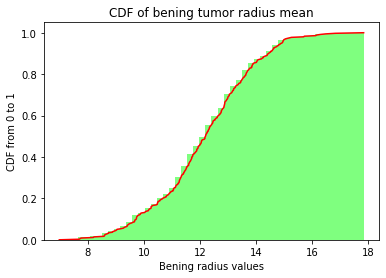

In [11]:
#Cumulative distribution function and graph

plt.hist(bening_data.radius_mean, bins = 50, fc = (0, 1, 0, 0.5), label = 'Bening', normed = True, cumulative = True )
sorted_data = np.sort(bening_data.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data, y, color='red')
plt.title('CDF of bening tumor radius mean')
plt.xlabel('Bening radius values')
plt.ylabel('CDF from 0 to 1')
plt.show()

In [12]:
# Effect size and correlation between two groups (malignant and bening)

mean_diff = malignant_data.radius_mean.mean() - bening_data.radius_mean.mean()
var_malignant = malignant_data.radius_mean.var()
var_bening = bening_data.radius_mean.var()
var_pooled = (len(malignant_data) * var_malignant + (len(bening_data) * var_bening)) / float(len(bening_data) + len(malignant_data))
effect_size = mean_diff / np.sqrt(var_pooled)
print("Effect size: ", effect_size)

# Correlation between malignant and bening data is > 1. No correlation. Two groups are different from each other

Effect size:  2.2048585165041428


<Figure size 1080x720 with 0 Axes>

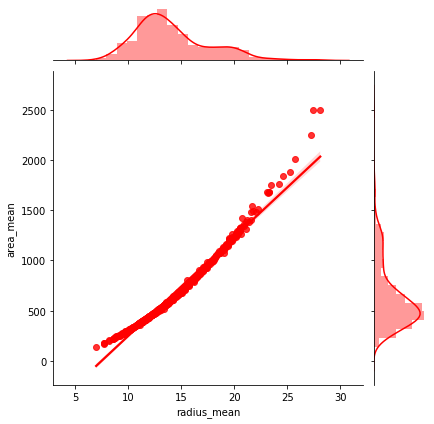

In [13]:
# Relationship check between two vars "area_mean" and "radius_mean" --> assumption: bigger radius than bigger the area

plt.figure(figsize=(15,10))
sns.jointplot(data.radius_mean, data.area_mean, kind = 'regg', color='red')
#sns.regplot(data.radius_mean, data.area_mean)
plt.show()
#Right assumption. Bigger the radius --> bigger the area

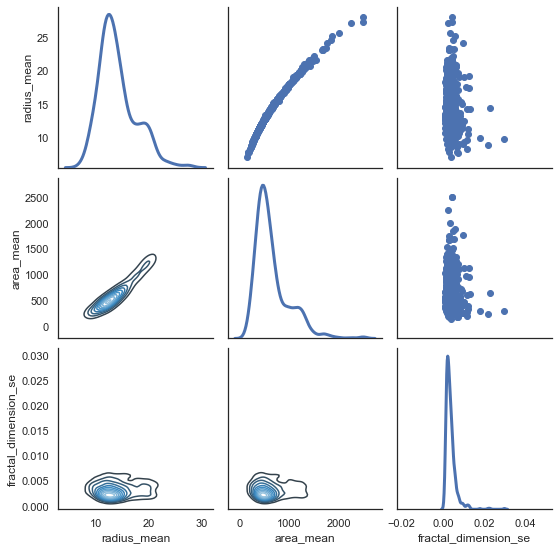

In [14]:
# More relationships between other columns

sns.set(style = 'white')
df = data.loc[:, ['radius_mean', 'area_mean', 'fractal_dimension_se']]

g = sns.PairGrid(df, diag_sharey = False)
g.map_lower(sns.kdeplot, cmap = "Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw = 3)
plt.show()

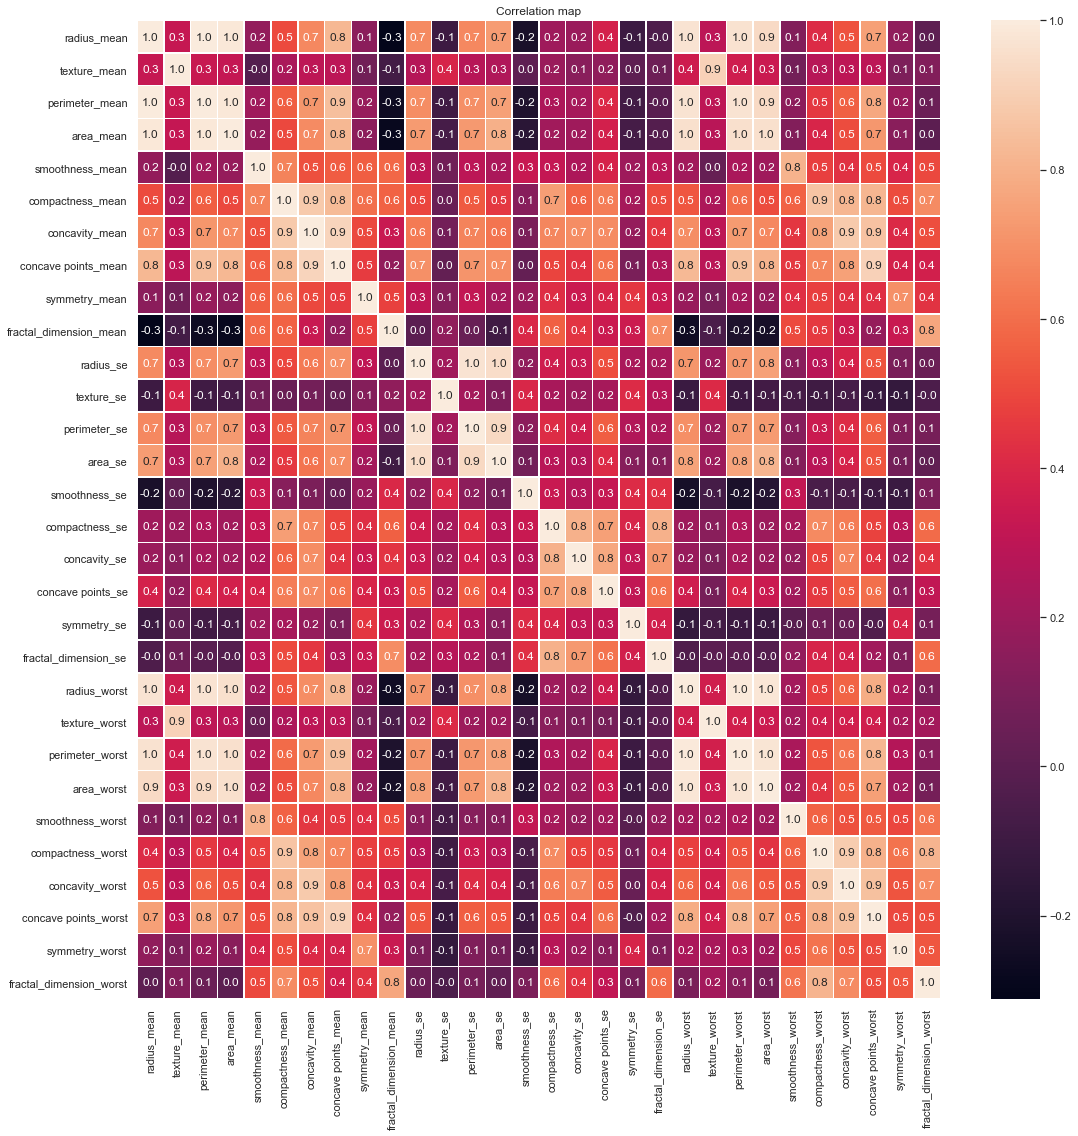

In [15]:
# Correlation map to see the strength of replationship

f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, linewidth = 0.5, fmt = '.1f', ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation map')
plt.savefig('corr_map.png')
plt.show()

Covariance between area_mean and radius_mean:  1224.4834093464565
Covariance between area_mean and fractal_dimension:  -0.0003976248576440626


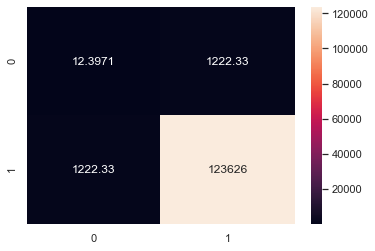

In [16]:
# Covariance between fractal dimension and radius mean (with plot)

covMatrix = np.cov(data.radius_mean, data.area_mean, bias=True)

print('Covariance between area_mean and radius_mean: ', data.radius_mean.cov(data.area_mean))
print('Covariance between area_mean and fractal_dimension: ', data.radius_mean.cov(data.fractal_dimension_se))

sns.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

In [17]:
# Pearson correlation between radius_mean and area_mean because of high covariance between them

pears1 = data.loc[:, ['area_mean', 'radius_mean']].corr(method='pearson')
pears2 = data.radius_mean.cov(data.area_mean) / (data.area_mean.std() * data.radius_mean.std())

print('Pearson correlation implemented: \n', pears1)
print('Pearson correlation by formula: ', pears2)


Pearson correlation implemented: 
              area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation by formula:  0.9873571700566128


In [18]:
# Spearmans correlation with ranking

ranked_data = data.rank()
spear = ranked_data.loc[:, ['radius_mean', 'area_mean']].corr(method = 'spearman')

print('Spearman correlation: \n', spear)

Spearman correlation: 
              radius_mean  area_mean
radius_mean     1.000000   0.999602
area_mean       0.999602   1.000000


In [19]:
# explorative data analysis with function for good overview of key parameters

def eda(df):
    eda_df = {}
    
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)

print(eda(malignant_data))
    

                          dtypes  count         mean       median       min  \
area_mean                float64    212   978.376415   932.000000     361.6   
area_se                  float64    212    72.672406    58.455000     13.99   
area_worst               float64    212  1422.286321  1303.000000     508.1   
compactness_mean         float64    212     0.145188     0.132350   0.04605   
compactness_se           float64    212     0.032281     0.028590  0.008422   
compactness_worst        float64    212     0.374824     0.356350   0.05131   
concave points_mean      float64    212     0.087990     0.086280   0.02031   
concave points_se        float64    212     0.015060     0.014205  0.005174   
concave points_worst     float64    212     0.182237     0.182000   0.02899   
concavity_mean           float64    212     0.160775     0.151350   0.02398   
concavity_se             float64    212     0.041824     0.037125   0.01101   
concavity_worst          float64    212     0.450606

Number of B: 357
Number of M: 212


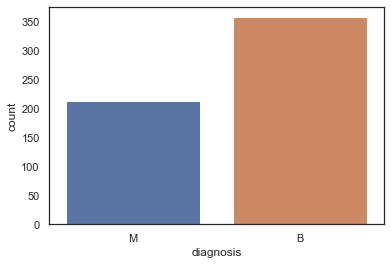

In [21]:
diag = data['diagnosis']
x = sns.countplot(diag, label='Count')
B, M = diag.value_counts()
print('Number of B:', B)
print('Number of M:', M)